date si statistici descriptive (estimari frecventiste)
media esantionului    = 58.00
deviatia std. esant.  = 2.00

a) model bayesian cu prior slab (μ ~ N(x̄, 10^2))
x (centrul priorului pentru μ) = x̄ = 58.00



Output()

rezumat posterior (prior slab):
         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     58.001  0.766    56.415     59.504      0.020    0.020    1570.0   
sigma   2.348  0.677     1.307      3.706      0.016    0.018    1883.0   

       ess_tail  r_hat  
mu       1493.0    1.0  
sigma    2166.0    1.0   

interpretare b) – 95% HDI:
  - HDI 95% pentru μ  ≈ [56.41, 59.50]
  - HDI 95% pentru σ  ≈ [1.31, 3.71]



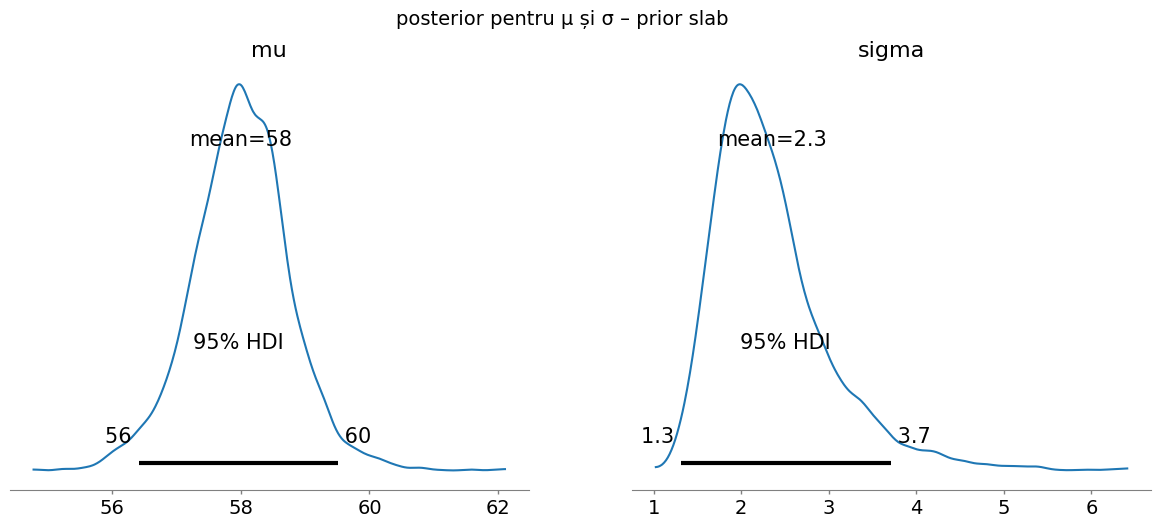

c) comparatie cu estimările frecventiste
Estimari frecventiste (din date):
  media (mean)        = 58.00
  deviatia std. (ŝ)  = 2.00

estimari bayesiene (prior slab) – din rezumatul posterior:
         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     58.001  0.766    56.415     59.504      0.020    0.020    1570.0   
sigma   2.348  0.677     1.307      3.706      0.016    0.018    1883.0   

       ess_tail  r_hat  
mu       1493.0    1.0  
sigma    2166.0    1.0   

  - media posteriora a lui μ ar trebui sa fie foarte aproape de media esantionului.
  - media posteriora a lui σ poate fi usor diferita de deviatia standard esantionala,deoarece este influentata si de priorul HalfNormal(10).



In [9]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

data = np.array([56, 60, 58, 55, 57, 59, 61, 56, 58, 60])

x_bar = data.mean()
s_hat = data.std(ddof=1)


print("date si statistici descriptive (estimari frecventiste)")
print(f"media esantionului    = {x_bar:.2f}")
print(f"deviatia std. esant.  = {s_hat:.2f}\n")

# a)

print("a) model bayesian cu prior slab (μ ~ N(x̄, 10^2))")
print(f"x (centrul priorului pentru μ) = x̄ = {x_bar:.2f}\n")

with pm.Model() as weak_model:
    mu = pm.Normal("mu", mu=x_bar, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=10)
    y = pm.Normal("y", mu=mu, sigma=sigma, observed=data)

    # b)
    trace_weak = pm.sample(
        draws=2000,
        tune=2000,
        target_accept=0.9,
        random_seed=42
    )

summary_weak = az.summary(
    trace_weak,
    var_names=["mu", "sigma"],
    hdi_prob=0.95
)

print("rezumat posterior (prior slab):")
print(summary_weak, "\n")

mu_hdi_low = summary_weak.loc["mu", "hdi_2.5%"]
mu_hdi_high = summary_weak.loc["mu", "hdi_97.5%"]
sg_hdi_low = summary_weak.loc["sigma", "hdi_2.5%"]
sg_hdi_high = summary_weak.loc["sigma", "hdi_97.5%"]

print("interpretare b) – 95% HDI:")
print(f"  - HDI 95% pentru μ  ≈ [{mu_hdi_low:.2f}, {mu_hdi_high:.2f}]")
print(f"  - HDI 95% pentru σ  ≈ [{sg_hdi_low:.2f}, {sg_hdi_high:.2f}]\n")

az.plot_posterior(trace_weak, var_names=["mu", "sigma"], hdi_prob=0.95)
plt.suptitle("posterior pentru μ și σ – prior slab", fontsize=14)
plt.show()

# c)

print("c) comparatie cu estimările frecventiste")
print("Estimari frecventiste (din date):")
print(f"  media (mean)        = {x_bar:.2f}")
print(f"  deviatia std. (ŝ)  = {s_hat:.2f}\n")

print("estimari bayesiene (prior slab) – din rezumatul posterior:")
print(summary_weak, "\n")

print("  - media posteriora a lui μ ar trebui sa fie foarte aproape de media esantionului.")
print("  - media posteriora a lui σ poate fi usor diferita de deviatia standard esantionala,deoarece este influentata si de priorul HalfNormal(10).\n")

